## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Stakeholder: Real Estate Investment Firm interested in buying houses, improving them, and selling them.
Target: price

# EDA

## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.api as sm

## Functions

In [2]:
def drop_outliers(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1

    lower_lim = q1 - 1.5 * iqr
    upper_lim = q3 + 1.5 * iqr

    df = df.loc[ (df[col] >= lower_lim) & (df[col] <= upper_lim) ].reset_index(drop=True)
    return df

In [3]:
def scale_numberical_cols(df, cols_to_scale):
    df = df.copy()
    features = cols_to_scale
    autoscaler = StandardScaler()
    df[features] = autoscaler.fit_transform(df[features])
    return df


## EDA

In [5]:
df = pd.read_csv('data/kc_house_data.csv')
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


### Drop Outliers (+- 1.5x Interquartile Range)

In [7]:
df = drop_outliers(df, 'sqft_living').reset_index(drop=True)
df = drop_outliers(df, 'price').reset_index(drop=True)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.773200e+04,2.773200e+04,27732.000000,27732.000000,27732.000000,2.773200e+04,27732.000000,27732.000000,27732.000000,27732.000000,27732.000000,27732.000000,27732.000000,27732.000000,27732.000000
mean,4.576995e+09,9.255347e+05,3.343718,2.227697,1957.740588,1.513921e+04,1.519202,1684.456404,444.418902,310.186644,198.359981,1974.238894,82.186463,47.310692,-121.287485
std,2.880229e+09,4.154978e+05,0.945557,0.777590,755.588197,5.284328e+04,0.567519,713.536830,534.016156,267.561591,219.743324,31.909745,396.782608,1.466165,5.824596
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.126077e+09,6.275000e+05,3.000000,2.000000,1380.000000,4.691750e+03,1.000000,1150.000000,0.000000,0.000000,36.000000,1952.000000,0.000000,47.388868,-122.329877
50%,3.885804e+09,8.250000e+05,3.000000,2.500000,1840.000000,7.284500e+03,1.500000,1500.000000,0.000000,370.000000,140.000000,1976.000000,0.000000,47.540435,-122.236525
75%,7.304301e+09,1.163062e+06,4.000000,2.500000,2434.750000,1.007750e+04,2.000000,2100.000000,900.000000,490.000000,290.000000,2002.000000,0.000000,47.670519,-122.117440
max,9.904000e+09,2.190000e+06,11.000000,7.500000,4410.000000,3.067495e+06,4.000000,5500.000000,3560.000000,2840.000000,2880.000000,2022.000000,2022.000000,64.824070,-70.074340


### Finding & Dropping Nulls

In [8]:
df.isnull().sum().sum()

28

In [9]:
df = df.dropna().reset_index(drop=True)

In [10]:
df.isnull().sum().sum()

0

### Dropping Undesired Columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26420 entries, 0 to 26419
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             26420 non-null  int64  
 1   date           26420 non-null  object 
 2   price          26420 non-null  float64
 3   bedrooms       26420 non-null  int64  
 4   bathrooms      26420 non-null  float64
 5   sqft_living    26420 non-null  int64  
 6   sqft_lot       26420 non-null  int64  
 7   floors         26420 non-null  float64
 8   waterfront     26420 non-null  object 
 9   greenbelt      26420 non-null  object 
 10  nuisance       26420 non-null  object 
 11  view           26420 non-null  object 
 12  condition      26420 non-null  object 
 13  grade          26420 non-null  object 
 14  heat_source    26420 non-null  object 
 15  sewer_system   26420 non-null  object 
 16  sqft_above     26420 non-null  int64  
 17  sqft_basement  26420 non-null  int64  
 18  sqft_g

In [12]:
df = df.drop(['view', 
              'sqft_above',
              'yr_renovated', 
              'id'
             ], axis=1)

### Extract zide codes from address to use as possible feature

In [13]:
df['zipcode'] = df.address.str[-20:-15]
df['zipcode'].value_counts()

98042    985
98038    853
98103    740
98117    731
98115    719
        ... 
98372      2
98387      1
98296      1
98050      1
98422      1
Name: zipcode, Length: 79, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26420 entries, 0 to 26419
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           26420 non-null  object 
 1   price          26420 non-null  float64
 2   bedrooms       26420 non-null  int64  
 3   bathrooms      26420 non-null  float64
 4   sqft_living    26420 non-null  int64  
 5   sqft_lot       26420 non-null  int64  
 6   floors         26420 non-null  float64
 7   waterfront     26420 non-null  object 
 8   greenbelt      26420 non-null  object 
 9   nuisance       26420 non-null  object 
 10  condition      26420 non-null  object 
 11  grade          26420 non-null  object 
 12  heat_source    26420 non-null  object 
 13  sewer_system   26420 non-null  object 
 14  sqft_basement  26420 non-null  int64  
 15  sqft_garage    26420 non-null  int64  
 16  sqft_patio     26420 non-null  int64  
 17  yr_built       26420 non-null  int64  
 18  addres

### Add feature for age when sold

In [15]:
df['date'].value_counts()
df['date_year'] = df['date'].apply(pd.to_datetime)
df['date_year'] = df['date_year'].dt.year
df['date_year']

df['age_when_sold'] = df['date_year'] - df['yr_built']
df['age_when_sold']

0         53
1         71
2         65
3         11
4          9
        ... 
26415    100
26416     10
26417     27
26418     16
26419     57
Name: age_when_sold, Length: 26420, dtype: int64

In [16]:
df['yr_built'].value_counts()

2021    1129
1968     482
1967     451
1978     450
1977     450
        ... 
1901      36
1935      35
1934      34
1902      31
1933      29
Name: yr_built, Length: 123, dtype: int64

In [17]:
# df[['date', 'yr_built']] = df[['date', 'yr_built']].apply(pd.to_datetime)
# df['age_when_sold'] = ((df['date'] - df['yr_built']).dt.days)/365
# df['age_when_sold'].value_counts()
# # df['yr_built'].value_counts()

In [18]:
# df['year_sold'] = df['date'].dt.year
# df['year_sold'].value_counts()
# len(df)

In [19]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,sqft_garage,sqft_patio,yr_built,lat,long,date_year,age_when_sold
count,2.642000e+04,26420.000000,26420.000000,26420.000000,2.642000e+04,26420.000000,26420.000000,26420.000000,26420.000000,26420.000000,26420.000000,26420.000000,26420.000000,26420.000000
mean,9.354395e+05,3.369531,2.225360,1975.344928,1.524770e+04,1.489421,455.593565,315.607419,196.662983,1972.573051,47.538172,-122.226127,2021.354996,48.781945
std,4.291241e+05,0.943124,0.784123,757.302280,5.227460e+04,0.547000,542.107520,268.206900,220.967477,31.388103,0.150008,0.128973,0.478521,31.406812
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,0.000000,1900.000000,47.000860,-122.526650,2021.000000,-1.000000
25%,6.250000e+05,3.000000,2.000000,1400.000000,4.900000e+03,1.000000,0.000000,0.000000,30.000000,1951.000000,47.406434,-122.333679,2021.000000,22.000000
50%,8.260000e+05,3.000000,2.500000,1870.000000,7.360000e+03,1.000000,0.000000,380.000000,130.000000,1974.000000,47.550115,-122.257115,2021.000000,47.000000
75%,1.190470e+06,4.000000,2.500000,2450.000000,1.013200e+04,2.000000,920.000000,500.000000,290.000000,1999.000000,47.673411,-122.139277,2022.000000,70.000000
max,2.230000e+06,11.000000,7.500000,4410.000000,3.067495e+06,4.000000,3560.000000,2840.000000,2880.000000,2022.000000,47.876700,-121.829060,2022.000000,122.000000


Find the most correlated column to price

In [20]:
df.corr()['price'].sort_values()

age_when_sold   -0.073991
sqft_lot         0.060780
yr_built         0.075396
date_year        0.089280
long             0.145425
sqft_basement    0.196312
floors           0.209825
sqft_garage      0.216967
sqft_patio       0.233824
bedrooms         0.299602
bathrooms        0.418828
lat              0.440139
sqft_living      0.547406
price            1.000000
Name: price, dtype: float64

### EDA Visualizations

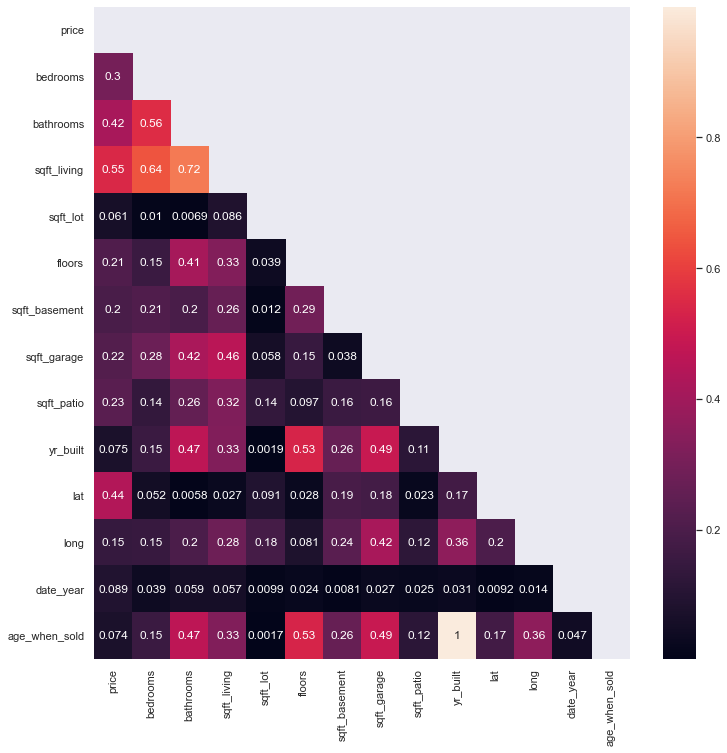

In [21]:
sns.set(rc={'figure.figsize':(12, 12)})

# Use the .heatmap function to depict the relationships visually!
mask  = np.triu(np.ones_like(df.corr()))
sns.heatmap(abs(df.corr()), annot=True, mask=mask);

In [22]:
#pairplot with wanted columns
#commented out for run-time

#sns.pairplot(df_colwanted)

Log Scale Target

<AxesSubplot:xlabel='price', ylabel='Count'>

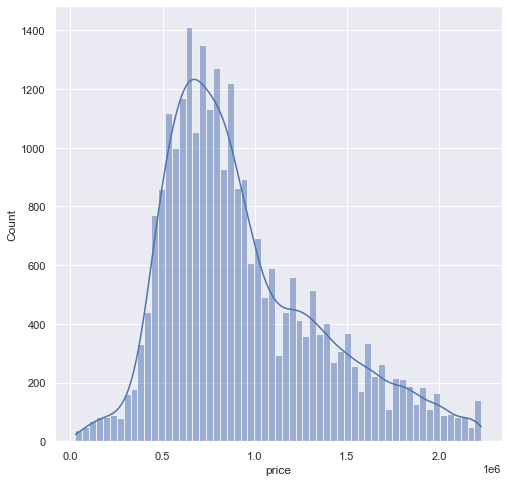

In [23]:
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(df.price, kde=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

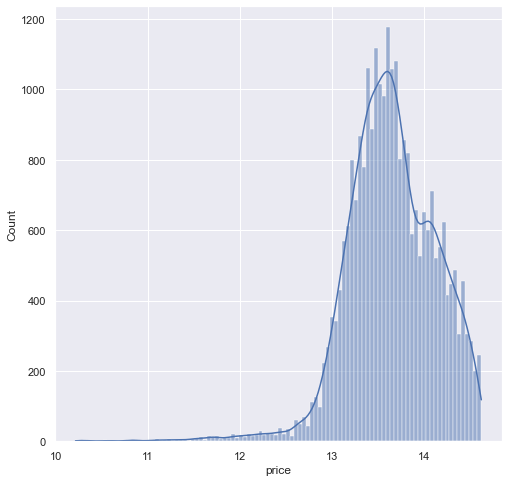

In [24]:
#logscaling target
fig, ax = plt.subplots(figsize=(8,8))
y2 = np.log(df.price)
sns.histplot(y2, kde=True)

### EDA - Baseline OLS Model

In [14]:
x = sm.add_constant(df[['sqft_living']])
y = df['price']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                 1.176e+04
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:01:30   Log-Likelihood:            -3.9322e+05
No. Observations:               27732   AIC:                         7.864e+05
Df Residuals:                   27730   BIC:                         7.865e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         3.38e+05   5806.589     58.204      0.000    3.27e+05    3.49e+05
sqft_living   300.1251      2.767    108.464      0.000     294.702     305.549
==============================================================================
Omnibus:                     1233.708   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1454.414
Skew:                           0.504   Prob(JB):                         0.00
Kurtosis:                       3.493   Cond. No.                     5.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
df['address']

0        2102 Southeast 21st Court, Renton, Washington ...
1        11231 Greenwood Avenue North, Seattle, Washing...
2        8504 South 113th Street, Seattle, Washington 9...
3        4079 Letitia Avenue South, Seattle, Washington...
4        2193 Northwest Talus Drive, Issaquah, Washingt...
                               ...                        
27687    4673 Eastern Avenue North, Seattle, Washington...
27688    4131 44th Avenue Southwest, Seattle, Washingto...
27689    910 Martin Luther King Jr Way, Seattle, Washin...
27690    17127 114th Avenue Southeast, Renton, Washingt...
27691    18615 7th Avenue South, Burien, Washington 981...
Name: address, Length: 27692, dtype: object

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.api as sm

def mapping_addressStreet(row):
    row = row.split(",")[0]
    row = row.split(" ")
    row = " ".join(row[1:])
    return row 

def mapping_addressCity(row):
    row = row.split(",")[-3].strip()
    return row 
    
def mapping_hasX(row):
    if row == 0:
        row = 0
    else:
        row = 1
    return row

def scale_numberical_cols(df, cols_to_scale):
    df = df.copy()
    features = cols_to_scale
    autoscaler = StandardScaler()
    df[features] = autoscaler.fit_transform(df[features])
    return df

def drop_outliers(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1

    lower_lim = q1 - 1.5 * iqr
    upper_lim = q3 + 1.5 * iqr

    df = df.loc[ (df[col] >= lower_lim) & (df[col] <= upper_lim) ].reset_index(drop=True)
    return df


df = pd.read_csv('data/kc_house_data.csv')
df = drop_outliers(df, 'sqft_living').reset_index(drop=True)
df = drop_outliers(df, 'price').reset_index(drop=True)
df = df.dropna().reset_index(drop=True)


df['date_year'] = df['date'].apply(pd.to_datetime)
df['date_year'] = df['date_year'].dt.year
df['date_year']
df['age_when_sold'] = df['date_year'] - df['yr_built']
df['age_when_sold']

# Continuous numbers
#df['sqft_living']
df['sqft_lot_less_living'] = df['sqft_lot'] - (df['sqft_living']/df['floors'])

# Nominal categories
df['zipcode'] = df.address.str[-20:-15]
df['has_garage'] = df['sqft_garage'].map(mapping_hasX)
df['has_patio'] = df['sqft_patio'].map(mapping_hasX)
df['has_basement'] = df['sqft_basement'].map(mapping_hasX)
df['zipcode'] = df.address.str[-20:-15]
#df['waterfront']
df['street'] = df['address'].map(mapping_addressStreet)
df['city'] = df['address'].map(mapping_addressCity)

# Ordinal categories
df['grade']

df = scale_numberical_cols(df, ['sqft_living', 'age_when_sold', 'sqft_lot_less_living'])



x = sm.add_constant(df[['sqft_living']])
y = df['price']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                 1.176e+04
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:56:36   Log-Likelihood:            -3.9264e+05
No. Observations:               27692   AIC:                         7.853e+05
Df Residuals:                   27690   BIC:                         7.853e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         9.26e+05   2091.210    442.802      0.000    9.22e+05     9.3e+05
sqft_living  2.268e+05   2091.210    108.441      0.000    2.23e+05    2.31e+05
==============================================================================
Omnibus:                     1234.082   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1454.890
Skew:                           0.505   Prob(JB):                         0.00
Kurtosis:                       3.493   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,long,date_year,age_when_sold,sqft_lot_less_living,zipcode,has_garage,has_patio,has_basement,street,city
0,7399300360,5/24/2022,675000.0,4,1.0,-1.031441,7140,1.0,NO,NO,...,-122.19052,2022,0.184379,-0.147410,98055,0,1,0,Southeast 21st Court,Renton
1,8910500230,12/13/2021,920000.0,5,2.5,1.074642,6703,1.0,NO,NO,...,-122.35591,2021,0.748342,-0.186239,98133,0,1,1,Greenwood Avenue North,Seattle
2,1180000275,9/29/2021,311000.0,6,2.0,1.220346,6156,1.0,NO,NO,...,-122.22520,2021,0.560354,-0.198824,98178,0,0,1,South 113th Street,Seattle
3,1604601802,12/14/2021,775000.0,3,3.0,0.266648,1400,2.0,NO,NO,...,-122.29020,2021,-1.131536,-0.255448,98118,1,1,1,Letitia Avenue South,Seattle
4,8562780790,8/24/2021,592500.0,2,2.0,-1.110916,758,2.0,NO,NO,...,-122.07188,2021,-1.194199,-0.257785,98027,1,1,1,Northwest Talus Drive,Issaquah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27687,7834800180,11/30/2021,1555000.0,5,2.0,-0.064497,4000,1.5,NO,NO,...,-122.32940,2021,1.656950,-0.209347,98103,0,1,1,Eastern Avenue North,Seattle
27688,194000695,6/16/2021,1313000.0,3,2.0,0.081206,5800,2.0,NO,NO,...,-122.38851,2021,-1.162867,-0.169822,98116,0,1,0,44th Avenue Southwest,Seattle
27689,7960100080,5/27/2022,800000.0,3,2.0,-0.448626,3600,1.0,NO,NO,...,-122.29585,2022,-0.630235,-0.223650,98122,1,1,1,Martin Luther King Jr Way,Seattle
27690,2781280080,2/24/2022,775000.0,3,2.5,0.809726,2889,2.0,NO,NO,...,-122.18908,2022,-0.974880,-0.230852,98055,1,1,1,114th Avenue Southeast,Renton


<AxesSubplot:xlabel='price', ylabel='Count'>

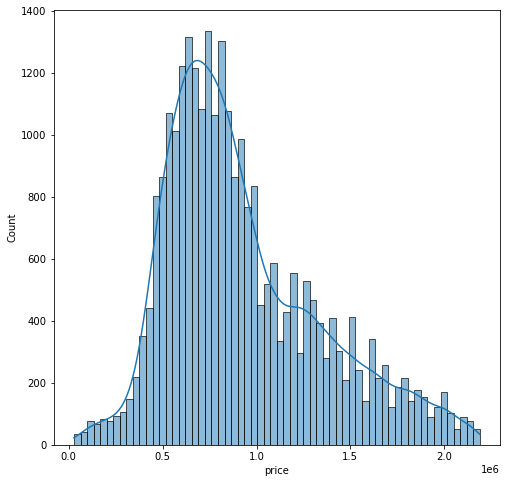

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(df.price, kde=True)

In [45]:
x = sm.add_constant(df[['sqft_living','sqft_lot_less_living']])    
y = df['price']
model = sm.OLS(y, x).fit()
model.summary()

# sqft lot helps condition no a lot

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     5886.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:46:19   Log-Likelihood:            -3.9264e+05
No. Observations:               27692   AIC:                         7.853e+05
Df Residuals:                   27689   BIC:                         7.853e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  9.26e+05   2090.883    442.871      0.000    9.22e+05     9.3e+05
sqft_living           2.262e+05   2098.380    107.808      0.000    2.22e+05     2.3e+05
sqft_lot_less_living  6524.0770   2098.380      3.109      0.002    2411.147    1.06e+04
==============================================================================
Omnibus:                     1223.273   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1439.380
Skew:                           0.503   Prob(JB):                         0.00
Kurtosis:                       3.487   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
x = sm.add_constant(df[['sqft_living','sqft_lot_less_living', 'age_when_sold']])    
y = df['price']
model = sm.OLS(y, x).fit()
model.summary()

# sqft lot helps condition no a lot

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     4116.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:27:29   Log-Likelihood:            -3.9244e+05
No. Observations:               27692   AIC:                         7.849e+05
Df Residuals:                   27688   BIC:                         7.849e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  9.26e+05   2075.816    446.085      0.000    9.22e+05     9.3e+05
sqft_living           2.392e+05   2181.541    109.666      0.000    2.35e+05    2.44e+05
sqft_lot_less_living  4952.9766   2084.724      2.376      0.018     866.815    9039.138
age_when_sold         4.372e+04   2173.872     20.110      0.000    3.95e+04     4.8e+04
==============================================================================
Omnibus:                     1083.525   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1279.411
Skew:                           0.460   Prob(JB):                    1.51e-278
Kurtosis:                       3.514   Cond. No.                         1.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x = sm.add_constant(df[['sqft_living','sqft_lot_less_living', 'age_when_sold']])


In [26]:
df.sqft_garage.value_counts()

0       8896
440     1304
480     1194
400      862
420      847
        ... 
644        1
532        1
235        1
315        1
1215       1
Name: sqft_garage, Length: 362, dtype: int64

In [18]:
def mapping_hasX(row):
    if row == 0:
        row = 0
    else:
        row = 1
    return row

In [13]:
df['condition'].value_counts()

Average      16862
Good          7570
Very Good     3015
Fair           221
Poor            64
Name: condition, dtype: int64

In [11]:
df['grade'].value_counts()

7 Average        11597
8 Good            9112
9 Better          3066
6 Low Average     2822
10 Very Good       613
5 Fair             388
11 Excellent        63
4 Low               50
3 Poor              13
12 Luxury            5
2 Substandard        2
1 Cabin              1
Name: grade, dtype: int64

In [21]:
# Number
df['sqft_living']
df['sqft_lot_less_living'] = df['sqft_lot'] - (df['sqft_living']/df['floors'])
#df['age_when_sold']

# Categories
df['zipcode'] = df.address.str[-20:-15]
df['has_garage'] = df['sqft_garage'].map(mapping_hasX)
df['has_patio'] = df['sqft_patio'].map(mapping_hasX)
df['has_basement'] = df['sqft_basement'].map(mapping_hasX)


#df['waterfront']
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,yr_built,yr_renovated,address,lat,long,sqft_lot_less_living,zipcode,has_garage,has_patio,has_basement
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,5960.000000,98055,0,1,0
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,3933.000000,98133,0,1,1
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,3276.000000,98178,0,0,1
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,320.000000,98118,1,1,1
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,198.000000,98027,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27727,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,2726.666667,98103,0,1,1
27728,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,4790.000000,98116,0,1,0
27729,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,1980.000000,98122,1,1,1
27730,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,1604.000000,98055,1,1,1


In [23]:
x = df[['sqft_living', 'sqft_lot_less_living', 'age_when_sold']]
ohe_cols = ['city','waterfront', 'has_basement', 'has_garage', 'has_patio']

ohe = OneHotEncoder(drop='first')
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),columns=ohe.get_feature_names())
X_cat = pd.concat([x,ohe_all], axis=1)
scaled_oheall_model = sm.OLS(y, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     144.6
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:11:46   Log-Likelihood:            -3.8434e+05
No. Observations:               27692   AIC:                         7.693e+05
Df Residuals:                   27389   BIC:                         7.718e+05
Df Model:                         302                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       5.196e+05    3.7e+04     14.056      0.000    4.47e+05    5.92e+05
sqft_living                 2.187e+05   1837.984    118.988      0.000    2.15e+05    2.22e+05
sqft_lot_less_living        2.326e+04   1645.050     14.138      0.000       2e+04    2.65e+04
age_when_sold               3.189e+04   2025.141     15.749      0.000    2.79e+04    3.59e+04
x0_Allston                  4.531e+05   1.22e+05      3.722      0.000    2.14e+05    6.92e+05
x0_Altoona                  5.007e+05   1.87e+05      2.677      0.007    1.34e+05    8.67e+05
x0_Ames Lake                4.893e+05   2.62e+05      1.868      0.062   -2.41e+04       1e+06
x0_Anchorage                 4.93e+05   1.54e+05      3.197      0.001    1.91e+05    7.95e+05
x0_Ardoch                   3.739e+05   1.35e+05      2.774      0.006     1.1e+05    6.38e+05
x0_Arlington                1.013e+06   1.54e+05      6.568      0.000    7.11e+05    1.32e+06
x0_Asbury Park              4.962e+05   9.89e+04      5.019      0.000    3.02e+05     6.9e+05
x0_Auburn                   3.155e+04   3.73e+04      0.845      0.398   -4.16e+04    1.05e+05
x0_Austin                  -1.114e+05   2.62e+05     -0.425      0.671   -6.25e+05    4.02e+05
x0_Baldwin                  6.368e+05   1.05e+05      6.078      0.000    4.31e+05    8.42e+05
x0_Baring                   8.335e+04   1.12e+05      0.744      0.457   -1.36e+05    3.03e+05
x0_Bay Shore                9.806e+05   1.87e+05      5.243      0.000    6.14e+05    1.35e+06
x0_Beach Haven              5.863e+05   7.86e+04      7.463      0.000    4.32e+05     7.4e+05
x0_Beaux Arts               1.248e+06   1.12e+05     11.134      0.000    1.03e+06    1.47e+06
x0_Beaver Falls             3.638e+05   2.62e+05      1.389      0.165    -1.5e+05    8.77e+05
x0_Beaverton                1.123e+06   2.62e+05      4.290      0.000     6.1e+05    1.64e+06
x0_Bellevue                 7.552e+05   3.76e+04     20.101      0.000    6.82e+05    8.29e+05
x0_Berger                   7.429e+05   1.87e+05      3.972      0.000    3.76e+05    1.11e+06
x0_Billings                 5.971e+05   1.87e+05      3.193      0.001    2.31e+05    9.64e+05
x0_Bismarck                 4.466e+05   8.64e+04      5.168      0.000    2.77e+05    6.16e+05
x0_Black Diamond             7.35e+04      4e+04      1.838      0.066   -4897.341    1.52e+05
x0_Boise                     9.54e+05   2.62e+05      3.642      0.000    4.41e+05    1.47e+06
x0_Bothell                  4.981e+05   4.02e+04     12.383      0.000    4.19e+05    5.77e+05
x0_Bradenton                6.962e+05   2.62e+05      2.658      0.008    1.83e+05    1.21e+06
x0_Brentwood                6.125e+05   1.54e+05      3.972      0.000     3.1e+05    9.15e+05
x0_Brooksville                8.2e+05   2.6

grades_encodedNow to add in the most important ordinal one - grade

In [29]:
# ordinally encoding grade
grade_df = df[['grade']]
grade_cats = [['2 Substandard',
               '3 Poor',
               '4 Low',
               '5 Fair',
               '6 Low Average',
               '7 Average',
               '8 Good',
               '9 Better',
               '10 Very Good',
               '11 Excellent',
               '12 Luxury',
               '13 Mansion']]
ords_grade = OrdinalEncoder(categories=grade_cats)
ords_grade.fit(grade_df)
ords_grade.transform(grade_df)
grades_encoded = pd.DataFrame(ords_grade.transform(grade_df))


x=df[['sqft_living', 'sqft_lot_less_living', 'age_when_sold']]
ohe_cols = ['city','waterfront', 'has_basement', 'has_garage', 'has_patio']
ohe = OneHotEncoder(drop='first')

ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all,grades_encoded], axis=1)
scaled_oheall_model = sm.OLS(y, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     163.0
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:17:45   Log-Likelihood:            -3.8327e+05
No. Observations:               27692   AIC:                         7.671e+05
Df Residuals:                   27388   BIC:                         7.696e+05
Df Model:                         303                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       4667.9822   3.72e+04      0.125      0.900   -6.83e+04    7.76e+04
sqft_living                 1.623e+05   2136.494     75.980      0.000    1.58e+05    1.67e+05
sqft_lot_less_living        2.196e+04   1582.745     13.875      0.000    1.89e+04    2.51e+04
age_when_sold               7.134e+04   2121.279     33.632      0.000    6.72e+04    7.55e+04
x0_Allston                  3.162e+05   1.17e+05      2.699      0.007    8.66e+04    5.46e+05
x0_Altoona                  3.281e+05    1.8e+05      1.823      0.068   -2.47e+04    6.81e+05
x0_Ames Lake                4.626e+05   2.52e+05      1.836      0.066   -3.12e+04    9.57e+05
x0_Anchorage                 3.47e+05   1.48e+05      2.338      0.019    5.61e+04    6.38e+05
x0_Ardoch                   3.189e+05    1.3e+05      2.459      0.014    6.47e+04    5.73e+05
x0_Arlington                9.121e+05   1.48e+05      6.148      0.000    6.21e+05     1.2e+06
x0_Asbury Park              3.945e+05   9.51e+04      4.146      0.000    2.08e+05    5.81e+05
x0_Auburn                  -2.522e+04   3.59e+04     -0.702      0.483   -9.56e+04    4.52e+04
x0_Austin                   3.192e+04   2.52e+05      0.127      0.899   -4.62e+05    5.26e+05
x0_Baldwin                  4.421e+05   1.01e+05      4.383      0.000    2.44e+05     6.4e+05
x0_Baring                   6.893e+04   1.08e+05      0.639      0.523   -1.42e+05     2.8e+05
x0_Bay Shore                 8.19e+05    1.8e+05      4.551      0.000    4.66e+05    1.17e+06
x0_Beach Haven              4.498e+05   7.56e+04      5.947      0.000    3.02e+05    5.98e+05
x0_Beaux Arts                1.16e+06   1.08e+05     10.763      0.000    9.49e+05    1.37e+06
x0_Beaver Falls             2.349e+05   2.52e+05      0.932      0.351   -2.59e+05    7.29e+05
x0_Beaverton                9.636e+05   2.52e+05      3.825      0.000     4.7e+05    1.46e+06
x0_Bellevue                 6.459e+05   3.62e+04     17.836      0.000    5.75e+05    7.17e+05
x0_Berger                   5.057e+05    1.8e+05      2.810      0.005    1.53e+05    8.58e+05
x0_Billings                 4.683e+05    1.8e+05      2.603      0.009    1.16e+05    8.21e+05
x0_Bismarck                 3.412e+05   8.32e+04      4.104      0.000    1.78e+05    5.04e+05
x0_Black Diamond            4.047e+04   3.85e+04      1.052      0.293    -3.5e+04    1.16e+05
x0_Boise                    8.225e+05   2.52e+05      3.265      0.001    3.29e+05    1.32e+06
x0_Bothell                  4.222e+05   3.87e+04     10.902      0.000    3.46e+05    4.98e+05
x0_Bradenton                 4.45e+05   2.52e+05      1.766      0.077    -4.9e+04    9.39e+05
x0_Brentwood                4.242e+05   1.48e+05      2.859      0.004    1.33e+05    7.15e+05
x0_Brooksville              5.603e+05   2.5

In [30]:
# ordinally encoding condition
cond_df = df[['condition']]
cond_cats = [['Poor',
              'Fair',
              'Average',
              'Good',
              'Very Good']]
ords_cond = OrdinalEncoder(categories=cond_cats)
ords_cond.fit(cond_df)
ords_cond.transform(cond_df)
cond_encoded = pd.DataFrame(ords_cond.transform(cond_df))
cond_encoded

x=df[['sqft_living', 'sqft_lot_less_living', 'age_when_sold']]
ohe_cols = ['city','waterfront', 'has_basement', 'has_garage', 'has_patio']
ohe = OneHotEncoder(drop='first')

ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all,cond_encoded], axis=1)
scaled_oheall_model = sm.OLS(y, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     146.9
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:19:11   Log-Likelihood:            -3.8418e+05
No. Observations:               27692   AIC:                         7.690e+05
Df Residuals:                   27388   BIC:                         7.715e+05
Df Model:                         303                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       4.228e+05   3.71e+04     11.386      0.000     3.5e+05    4.96e+05
sqft_living                 2.186e+05   1827.177    119.611      0.000    2.15e+05    2.22e+05
sqft_lot_less_living        2.397e+04   1635.836     14.653      0.000    2.08e+04    2.72e+04
age_when_sold               2.043e+04   2110.867      9.677      0.000    1.63e+04    2.46e+04
x0_Allston                  4.417e+05   1.21e+05      3.650      0.000    2.04e+05    6.79e+05
x0_Altoona                  4.972e+05   1.86e+05      2.674      0.008    1.33e+05    8.62e+05
x0_Ames Lake                4.985e+05    2.6e+05      1.914      0.056   -1.19e+04    1.01e+06
x0_Anchorage                4.909e+05   1.53e+05      3.202      0.001     1.9e+05    7.91e+05
x0_Ardoch                   3.744e+05   1.34e+05      2.794      0.005    1.12e+05    6.37e+05
x0_Arlington                1.011e+06   1.53e+05      6.598      0.000    7.11e+05    1.31e+06
x0_Asbury Park              4.983e+05   9.83e+04      5.070      0.000    3.06e+05    6.91e+05
x0_Auburn                   1.684e+04   3.71e+04      0.454      0.650   -5.59e+04    8.96e+04
x0_Austin                  -1.098e+05    2.6e+05     -0.422      0.673    -6.2e+05    4.01e+05
x0_Baldwin                  6.346e+05   1.04e+05      6.093      0.000     4.3e+05    8.39e+05
x0_Baring                   9.977e+04   1.11e+05      0.896      0.370   -1.19e+05    3.18e+05
x0_Bay Shore                9.824e+05   1.86e+05      5.284      0.000    6.18e+05    1.35e+06
x0_Beach Haven              5.847e+05   7.81e+04      7.487      0.000    4.32e+05    7.38e+05
x0_Beaux Arts               1.257e+06   1.11e+05     11.284      0.000    1.04e+06    1.48e+06
x0_Beaver Falls             3.662e+05    2.6e+05      1.406      0.160   -1.44e+05    8.77e+05
x0_Beaverton                 1.14e+06    2.6e+05      4.380      0.000     6.3e+05    1.65e+06
x0_Bellevue                 7.391e+05   3.74e+04     19.783      0.000    6.66e+05    8.12e+05
x0_Berger                     7.4e+05   1.86e+05      3.980      0.000    3.76e+05     1.1e+06
x0_Billings                 6.009e+05   1.86e+05      3.232      0.001    2.36e+05    9.65e+05
x0_Bismarck                 4.455e+05   8.59e+04      5.186      0.000    2.77e+05    6.14e+05
x0_Black Diamond            6.411e+04   3.98e+04      1.612      0.107   -1.38e+04    1.42e+05
x0_Boise                    9.517e+05    2.6e+05      3.655      0.000    4.41e+05    1.46e+06
x0_Bothell                  4.928e+05      4e+04     12.324      0.000    4.14e+05    5.71e+05
x0_Bradenton                6.959e+05    2.6e+05      2.673      0.008    1.86e+05    1.21e+06
x0_Brentwood                6.103e+05   1.53e+05      3.982      0.000     3.1e+05    9.11e+05
x0_Brooksville              8.172e+05    2.

In [ ]:
x = sm.add_constant(df[['sqft_living', 'sqft_lot', 'sqft_patio']])
y = df['price']
model = sm.OLS(y, x).fit()
model.rsquared

In [ ]:
model.summary()

### EDA - Log Scaled OLS Model

In [ ]:
x = sm.add_constant(df[['sqft_living', 'sqft_lot_less_living']])
y2 = np.log(df['price'])
model = sm.OLS(y2, x).fit()
model.rsquared

In [ ]:
model.summary()

### EDA - Log Scaled OLS

Dropping columns to address multicolinearity

In [ ]:
x = sm.add_constant(df[['sqft_living', 'age_when_sold']])
y2 = np.log(df['price'])
model = sm.OLS(y2, x).fit()
model.summary()

In [ ]:
model.summary()

### EDA - OneHotEncoding

In [ ]:
#0:number of baths
#1:number of bedrooms
#2:condition
#3:heat source

ohe = OneHotEncoder(drop='first')
ohe_cols = ['bathrooms', 
            'bedrooms', 
            'condition', 
            'heat_source']
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                        columns=ohe.get_feature_names())
ohe_all
X_cat = pd.concat([x,ohe_all], axis=1)
X_cat.head(2)

In [ ]:
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

### Scale the numerical columns

In [ ]:
df = scale_numberical_cols(df, ['sqft_living', 'age_when_sold', 'long', 'lat'])
df

In [ ]:
ohe_cols = ['bathrooms', 
            'bedrooms', 
            'condition', 
            'heat_source']

ohe = OneHotEncoder(drop='first')
    
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all], axis=1)
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

Scaling didn't change r squared (as expected)

### Testing adding additional categorical features with OHE

In [ ]:
ohe_cols = ['bathrooms', 
            'bedrooms', 
            'condition', 
            'heat_source',
            'waterfront', 
            'floors', 
            'zipcode',
            'grade']

ohe = OneHotEncoder(drop='first')
    
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all], axis=1)
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

Notes:
- Durbin Watson score < 2 implies homoskedacity

### Ordinal Encoding Grade and Condition 

In [ ]:
df.grade.value_counts()

In [ ]:
# ordinally encoding grade
grade_df = df[['grade']]
grade_cats = [['2 Substandard',
               '3 Poor',
               '4 Low',
               '5 Fair',
               '6 Low Average',
               '7 Average',
               '8 Good',
               '9 Better',
               '10 Very Good',
               '11 Excellent',
               '12 Luxury',
               '13 Mansion']]
ords_grade = OrdinalEncoder(categories=grade_cats)
ords_grade.fit(grade_df)
ords_grade.transform(grade_df)
grades_encoded = pd.DataFrame(ords_grade.transform(grade_df))
grades_encoded

In [ ]:
df.condition.value_counts()

In [ ]:
# ordinally encoding condition
cond_df = df[['condition']]
cond_cats = [['Poor',
              'Fair',
              'Average',
              'Good',
              'Very Good']]
ords_cond = OrdinalEncoder(categories=cond_cats)
ords_cond.fit(cond_df)
ords_cond.transform(cond_df)
cond_encoded = pd.DataFrame(ords_cond.transform(cond_df))
cond_encoded.head()

In [ ]:
ordinal_df = pd.concat([grades_encoded, cond_encoded], axis=1)
ordinal_df.columns = ['grade', 'condition']

In [ ]:
ordinal_df

Drop condition and grade, and then add their encoded columns

In [ ]:
ohe_cols = ['bathrooms', 
            'bedrooms', 
            'heat_source', 
            'waterfront',
            'floors', 
            'zipcode']
ohe = OneHotEncoder(drop='first')
    
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all,ordinal_df], axis=1)
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

In [ ]:
# Dropping insignificant values (<0.05)
ohe_all_sig = ohe_all.drop(['x2_Gas/Solar',
                           'x2_Oil',
                           'x2_Oil/Solar',
                           'x4_1.5',
                           'x4_2.0',
                           'x4_2.5',
                           'x4_3.5',
                           'x4_4.0',
                           'x5_98003',
                           'x5_98030',
                           'x5_98031',
                            'x5_98032',
                            'x5_98047',
                            'x5_98092',
                            'x5_98148',
                            'x5_98296',
                            'x5_98354',
                            'x5_98387'], axis=1)

In [ ]:
# model with dropped insignificant values
ohe_cols = ['bathrooms', 
            'bedrooms', 
            'heat_source', 
            'waterfront',
            'floors', 
            'zipcode']
ohe = OneHotEncoder(drop='first')
    
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all_sig,ordinal_df], axis=1)
scaled_oheall_model = sm.OLS(y, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

In [ ]:
np.sqrt(scaled_oheall_model.mse_model)

In [ ]:
df.corr()['price']

In [ ]:
#pairplot with continuous variables
#commented out for run-time

# sns.pairplot(pd.concat([y, X_cat], axis=1))

### Checking Assumptions - Linearity

In [ ]:
x.head()

In [ ]:
# plotting residuals vs predictions
model_preds = scaled_oheall_model.predict(X_cat)
resids = y2 - model_preds

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(model_preds, resids)

ax.set_xlabel('predicted house prices')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');
